# Maestría en Inteligencia Artificial y Analítica de Datos

## Programación para Analítica Descriptiva y Predictiva - Marzo 2025
## Práctica: Práctica: Regresión Lineal Múltiple
---


## Datos del Estudiante

*   Apellidos y Nombre: **Pavel Andrés Aguilar Luna**
*   Matrícula: **255880**

---



##  Objetivo de aprendizaje
Al finalizar esta práctica, el estudiante será capaz de **aplicar regresión lineal múltiple utilizando Scikit-Learn para modelar la relación entre varias variables independientes y una variable dependiente**, verificar los supuestos del modelo, interpretar los coeficientes, analizar la correlación entre predictores y evaluar el rendimiento del modelo utilizando métricas como el MSE, RMSE y R².

Datos
Trabajarás con el archivo `advertising.csv`, que contiene información sobre el gasto publicitario en diferentes medios y las ventas obtenidas:

-`TV`: inversión en publicidad televisiva.

-`Radio`: inversión en publicidad en radio.

-`Newspaper`: inversión en publicidad en periódicos.

`Sales`: ventas del producto (variable dependiente).

In [49]:
from google.colab import drive
drive.mount('/content/drive')
def separador():
    print("\n" + "=" * 170 + "\n")
def header(Titulo):
  por=((170-len(Titulo))//10)
  a=int(1.2*por)
  print("."*a+"·"*a+"~"*a+"≈"*a+"≋"
  *int(por*.2),Titulo,"≋"*int(por*.2)
  +"≈"*a+"~"*a+"·"*a+"."*a,"\n\n")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Parte 1: Carga de datos y bibliotecas
1. Importa las bibliotecas necesarias.
2. Carga el archivo `advertising.csv`.
3. Muestra las primeras filas del dataframe.
4. Describe estadísticamente las variables.

In [50]:
import pandas as pd;df=pd.read_csv("/content/drive/MyDrive/Unidad04/advertising.csv")
import numpy as np;import matplotlib.pyplot as plt;import seaborn as sns
from sklearn.model_selection import train_test_split;from sklearn.linear_model import LinearRegression;from sklearn.metrics import mean_squared_error, r2_score
header('Parte 1');print(f'Primeras 8 filas del Dataset "advertising.csv" \n{df.head(8)}\n\nDescripción Estadistica:\n{df.describe()}');separador()

...................···················~~~~~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋≋ Parte 1 ≋≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~~~~~···················................... 


Primeras 8 filas del Dataset "advertising.csv" 
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
5    8.7   48.9       75.0    7.2
6   57.5   32.8       23.5   11.8
7  120.2   19.6       11.6   13.2

Descripción Estadistica:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000

## Parte 2: Análisis exploratorio de los datos
### 2.1  Análisis de la Relación Lineal entre la variable dependiente y las independientes
1. Grafica dispersión entre cada variable independiente (`TV`, `Radio`, `Newspaper`) y `Sales`. Usa también regplot.
2. Interpreta visualmente la relación entre variables.

...................···················~~~~~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋≋ Parte 2.1 ≋≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~~~~~···················................... 




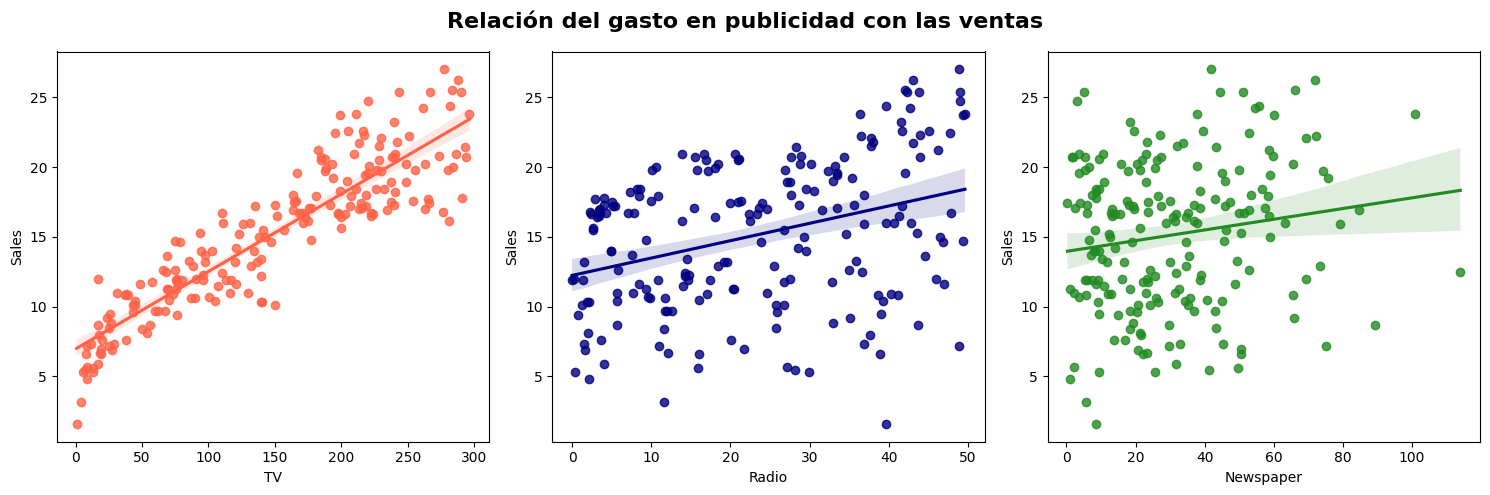

In [51]:
header('Parte 2.1')
fig, axs = plt.subplots(1, 3, figsize=(15, 5));plt.suptitle('Relación del gasto en publicidad con las ventas', size=16, fontweight='bold')
sns.regplot(x='TV', y='Sales', data=df, ax=axs[0], color='tomato');sns.regplot(x='Radio', y='Sales', data=df, ax=axs[1], color='navy');sns.regplot(x='Newspaper', y='Sales', data=df, ax=axs[2], color='forestgreen')
plt.tight_layout();plt.show()


# Según la grafica de puntos, las relaciones entre variables son:
* TV/Sales. Una relación positiva muy fuerte, como se puede apreciar muy claramente.
* Radio/Sales. Una relación positiva pero mucho mas debil que TV.
News.
* Nespaper/Sales. Tiene una relación muy debil, casi inexistente.

=================================================================================================================

### 2.2: Correlación entre variables
1. Calcula la matriz de correlación.
2. Visualízala con un heatmap.
3. Responde: ¿Qué variables están más correlacionadas con `Sales`? ¿Hay correlación alta entre predictores?

...................···················~~~~~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋≋ Parte 2.2 ≋≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~~~~~···················................... 




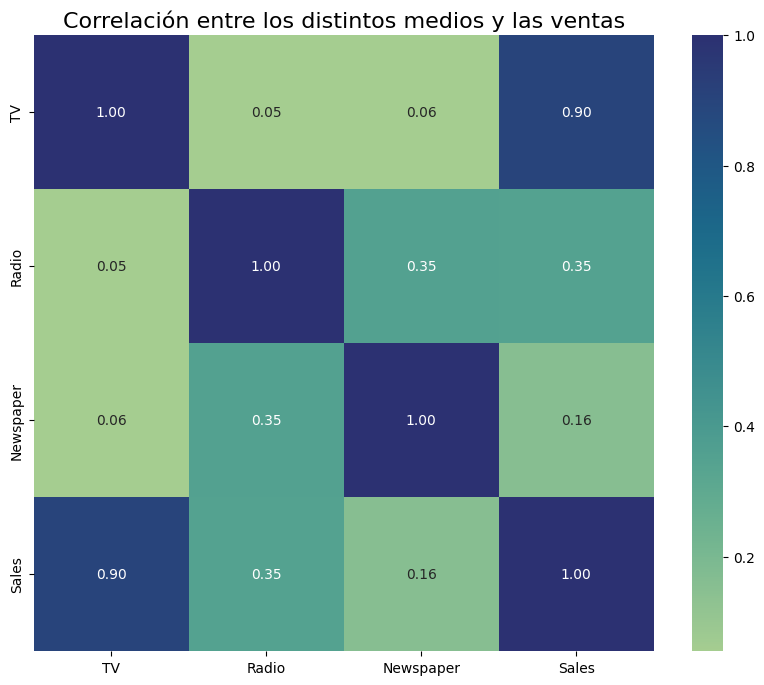

In [52]:
header('Parte 2.2')
matrizcorr= df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(data=matrizcorr, annot=True, cmap='crest', fmt=".2f")
plt.title('Correlación entre los distintos medios y las ventas', size=16)
plt.show()
#print(df.corr())

Según la gráfica el gasto de publicidad por tv presenta una alta correlación positiva con sales, quiere decir que la cantidad de dinero invertido en la publicidad tiene un gran impacto positivo en las ventas que tiene este medio. Luego sigue radio que es moderada y positiva, quiere decir que el monto invertido en la publicidad tiene poco impacto en las ventas. Al final newspaper que es muy debil, tambien positiva, lo que significa que el gasto publicitario no tiene casi impacto en las ventas de este medio, sería muy recomendable encontrar otra estrategia para optimizarlas.
Por otro lado, entre los predictores no hay una correlación relevante.


=================================================================================================================

## Parte 3. Multicolinealidad
1. Calcula el VIF (Variance Inflation Factor) para cada predictor.
2. Crea un diagrama de barras  para mostrar el  VIF
3. Interpreta si hay multicolinealidad:
- ¿Alguna variable tiene un VIF mayor a 5 o mayor a 10?
- ¿Qué implicaciones tiene esto para el modelo?

...................···················~~~~~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋≋ parte 3 ≋≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~~~~~···················................... 


    Variable       VIF
0         TV  2.486772
1      Radio  3.285462
2  Newspaper  3.055245


<ipython-input-53-909c572a2877>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  gr=sns.barplot(x='Variable', y='VIF', data=vif, order=vif.sort_values('VIF').Variable, palette='cubehelix', edgecolor='black', linewidth=.5)


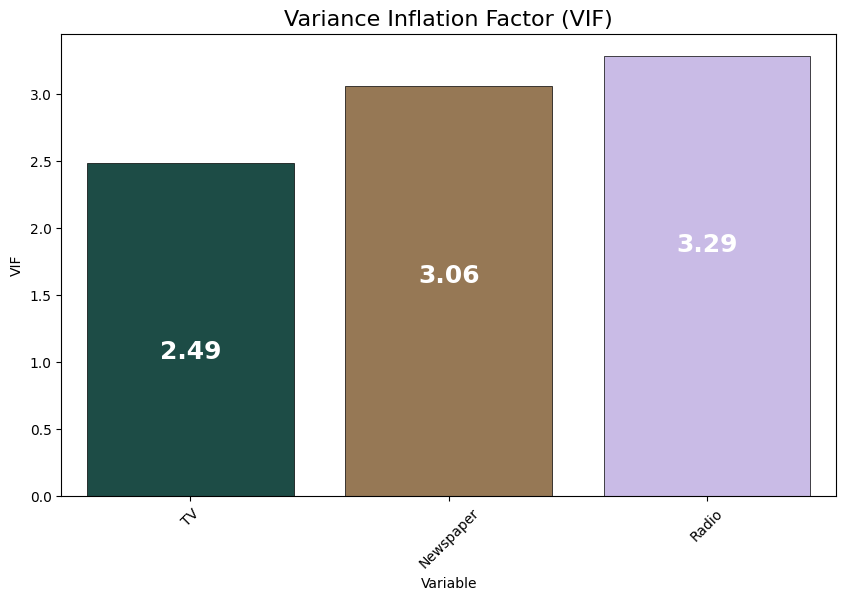

In [53]:
header('parte 3')
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[['TV', 'Radio', 'Newspaper']]
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)
plt.figure(figsize=(10, 6))
gr=sns.barplot(x='Variable', y='VIF', data=vif, order=vif.sort_values('VIF').Variable, palette='cubehelix', edgecolor='black', linewidth=.5)
for i, bar in enumerate(gr.patches):
    variable=vif.sort_values('VIF').Variable.iloc[i]
    valor=vif[vif.Variable==variable].VIF.values[0]
    gr.text(bar.get_x()+bar.get_width()/2,bar.get_height()-1.5,f'{valor:.2f}',ha='center',va='bottom',fontweight='bold', color='white', size=18)
plt.title('Variance Inflation Factor (VIF)', size=16)
plt.xticks(rotation=45)
plt.show()

**¿Alguna variable tiene un VIF mayor a 5 o mayor a 10?**
**¿Qué implicaciones tiene esto para el modelo?**

Todas las variables tienen un VIF en un rango de 0 a 5, lo que significa que presentan muy poca multicolinealidad, no se considera una cantidad preocupante, no es lo ideal, pero el modelo se podría considerar confiable.

=================================================================================================================

## Parte 4: Construcción del Modelo (Todas las variables Independientes), Evaluación

### 4.1 Entrenamiento del Modelo (Todas las Variables Independientes)

1. Entrena un modelo de regresión lineal múltiple usando TV, Radio y Newspaper como variables independientes.
2. Imprime el intercepto y los coeficientes del modelo.
3. Interpreta cada uno:
¿Qué significa cada uno de los coeficientes  en términos de ventas?

In [54]:
header('Parte 4.1')
#Entrenamiento del Modelo
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = LinearRegression()
modelo.fit(X_train, y_train)
#modelo.fit(X, y)
print(f'Intercepto: {modelo.intercept_}\nCoeficientes:')
for i,var in enumerate(X.columns):
  print(f"{var}:{modelo.coef_[i]}")
separador()

...................···················~~~~~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋≋ Parte 4.1 ≋≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~~~~~···················................... 


Intercepto: 4.714126402214127
Coeficientes:
TV:0.05450927083721978
Radio:0.10094536239295579
Newspaper:0.0043366468220340446




El intercepto dice que si el gasto en publicidad fuera nulo, o sea $0, se esperarian ventas de 4.7 unidades (no se el tipo de unidad).
Por otro lado, la diferencia en los coeficientes de tv y radio con respecto a la correlación que guarda la variable individual, es porque la escala de cada medio es muy diferente y por que los coeficientes de regresión multiple representan el efecto (en intensida) de cada variable, es decir cuando los demas predictores son constantes.

=================================================================================================================

### 4.2 Normalidad de los residuos

1. Calcula los residuos: residuos = y - y_pred.

2. Grafica un histograma con KDE de los residuos.

3. ¿Los residuos parecen distribuirse normalmente?

...................···················~~~~~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋≋ Parte 4.2 ≋≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~~~~~···················................... 




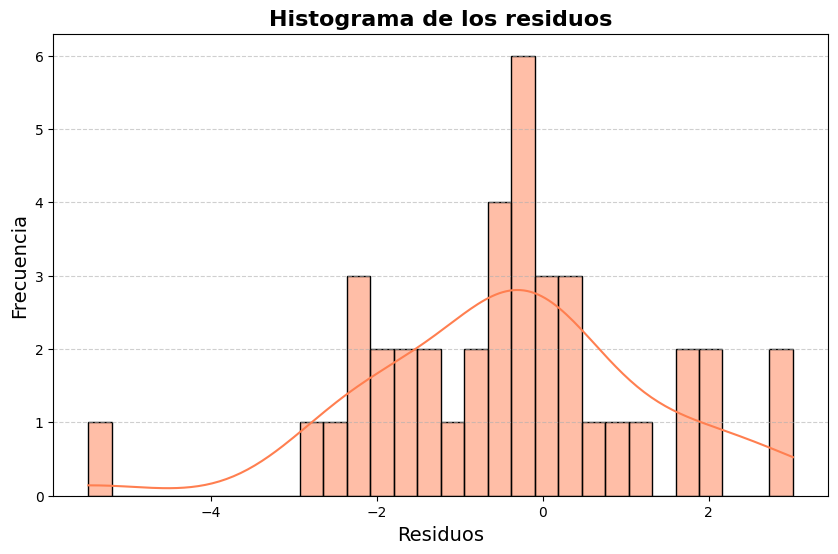

prueba de normalidad de los residuos:

Valor p: 0.3134976984995692


In [55]:
header('Parte 4.2')
residuos = y_test - modelo.predict(X_test)#print(residuos)
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, color='coral', bins=30)
plt.title('Histograma de los residuos', size=16, fontweight='bold')
plt.xlabel('Residuos', size=14)
plt.ylabel('Frecuencia', size=14)
plt.grid(axis='y', linestyle='--', alpha=.6)
plt.show()
from scipy import stats
print('prueba de normalidad de los residuos:\n')
shapiro_test = stats.shapiro(residuos)
print(f'Valor p: {shapiro_test.pvalue}')

Los residuos si parecen distribuirse de forma normal. Se aplica la prueba Shapiro-Wilk, que confirma la normalidad con un p-valor de .313.

### 4.3. Homocedasticidad

1. Grafica los residuos contra los valores predichos.
2. ¿Observas patrones? ¿Los residuos se dispersan aleatoriamente?

...................···················~~~~~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋≋ Parte 4.3 ≋≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~~~~~···················................... 




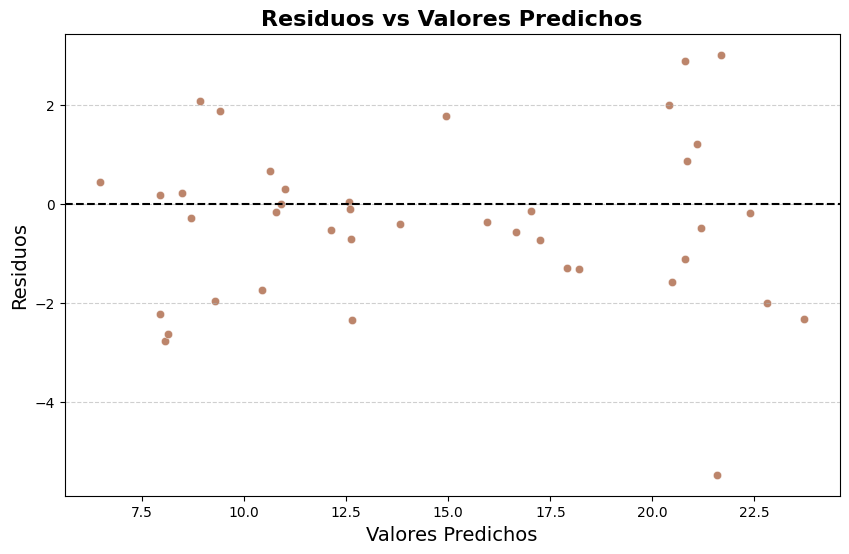

In [56]:
header('Parte 4.3')
plt.figure(figsize=(10, 6));sns.scatterplot(x=modelo.predict(X_test), y=residuos, color='sienna', alpha=.7)
plt.axhline(y=0, color='black', linestyle='--');plt.title('Residuos vs Valores Predichos', size=16, fontweight='bold')
plt.xlabel('Valores Predichos', size=14);plt.ylabel('Residuos', size=14);plt.grid(axis='y', linestyle='--', alpha=.6);plt.show()

Los residuos parecen dispersarse en torno a 0, no hay heterocedasticidad por que no se aprecian cambios sistematicos en los residuos conforme aumentan los valores predichos. Solo se alejan algunos valores atipicos, sin patron.

=================================================================================================================

### 4.4 Q-Q Plot

1. Graficar el Q-Q Plot
2. Interpreta el gráfico: a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal, b) Desviaciones sistemáticas indican asimetría o colas pesadas.

...................···················~~~~~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋≋ Parte 4.4 ≋≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~~~~~···················................... 




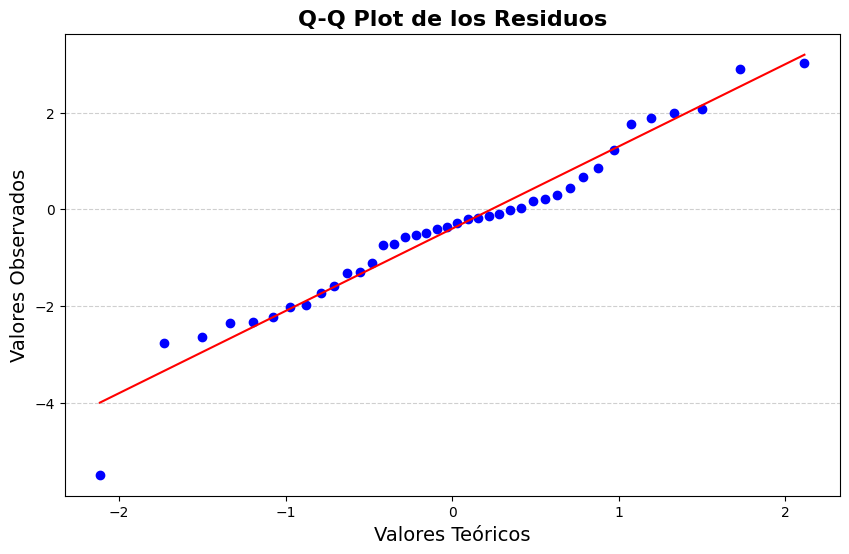

In [57]:
header('Parte 4.4')
plt.figure(figsize=(10, 6))
stats.probplot(residuos, dist='norm', plot=plt)
plt.title('Q-Q Plot de los Residuos', size=16, fontweight='bold')
plt.xlabel('Valores Teóricos', size=14)
plt.ylabel('Valores Observados', size=14)
plt.grid(axis='y', linestyle='--', alpha=.6)
plt.show()

Los residuos siguen una distribucion normal. Parecen seguir la diagonal, solo por un valor lejos (outlier), los demás no se alejan mucho e incluso algunos coinciden. Esto confirma la prueba de normalidad Shapiro-Wilk que apliqué en la parte 4.2.

=================================================================================================================

### 4.5. Evaluación del Modelo

1. Calcula las métricas: a) MSE (error cuadrático medio), b) RMSE (raíz del error cuadrático medio), c) R² (coeficiente de determinación)

2. ¿Qué nos dicen estas métricas sobre el ajuste del modelo?


In [58]:
header('Parte 4.5')
mse = mean_squared_error(y_test, modelo.predict(X_test))
rmse = np.sqrt(mse)
r2 = r2_score(y_test, modelo.predict(X_test))
print(f'MSE: {mse}\nRMSE: {rmse}\nR²: {r2}')
mae=np.mean(np.abs(y_test-modelo.predict(X_test))) #el mean absolute error lo había visto en kaggle
print(f'MAE: {mae}')

...................···················~~~~~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋≋ Parte 4.5 ≋≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~~~~~···················................... 


MSE: 2.9077569102710896
RMSE: 1.7052146229349223
R²: 0.9059011844150826
MAE: 1.2748262109549338


Los valores MSE y RMSE, son bajos, lo que le da confiabilidad al modelo. El valor .9 de r2 nos habla de que se representa una varianza del 90% de los datos, lo cual es muy bueno. El MAE lo había visto en un curso de kaggle de machine learning, no se si aplique para este caso, pero el 1.27 representa la diferencia entre los valores predichos y los reales. En resumen, es muy buen modelo.

=================================================================================================================

### 4.6. Visualización de Predicciones

1. Crea un gráfico comparando Sales reales vs Sales predichas.

2. Puedes usar plt.scatter(y_true, y_pred) para evaluar visualmente el ajuste.
3.¿Qué observas?¿Qué observas? ¿Qué información puedes obtener de esta gráfica?

...................···················~~~~~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋≋ Parte 4.6 ≋≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~~~~~···················................... 




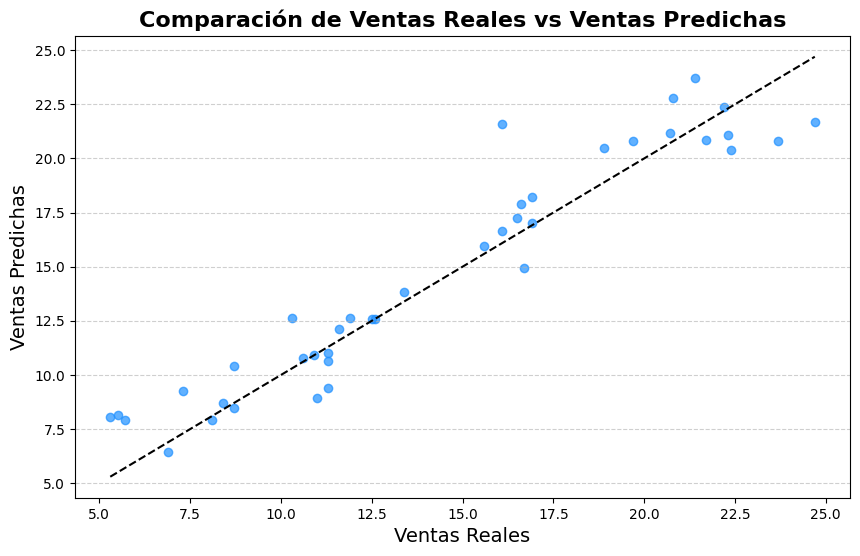

In [59]:
header('Parte 4.6')
plt.figure(figsize=(10, 6))
plt.scatter(y_test, modelo.predict(X_test), color='dodgerblue', alpha=.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')
plt.title('Comparación de Ventas Reales vs Ventas Predichas', size=16, fontweight='bold')
plt.xlabel('Ventas Reales', size=14)
plt.ylabel('Ventas Predichas', size=14)
plt.grid(axis='y', linestyle='--', alpha=.6)
plt.show()

Según se observa en la gráfica, los valores de las ventas predichas y las reales tienen una fuerte colinealidad, lo que quiere decir que el modelo es muy bueno.

=================================================================================================================

### 4.7 Verificar el impacto de los atributos en el modelo

1. Ajusta el modelo usando statsmodels en lugar de scikit-learn para obtener los valores p.
2. Interpreta los resultados:

 - Observa los valores P>|t| en la tabla de salida.

 - ¿Qué variables tienen p-value menores a 0.05?

 - ¿Cuál es la conclusión sobre esas variables?


In [60]:
header('Parte 4.7')
import statsmodels.api as sm
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = sm.add_constant(X_train)
modelo = sm.OLS(y_train, X_train).fit()
print(modelo.summary())

...................···················~~~~~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋≋ Parte 4.7 ≋≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~~~~~···················................... 


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     468.7
Date:                Fri, 04 Apr 2025   Prob (F-statistic):           8.51e-78
Time:                        04:11:36   Log-Likelihood:                -305.78
No. Observations:                 160   AIC:                             619.6
Df Residuals:                     156   BIC:                             631.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err     

Según la información arrojada por la tabla, las variables "TV" y "Radio" tienen un valor P>|t| menor de .05, significa que son buenas predictoras para "sales", o sea que entre más se invierta en publicidad mejoran las ventas. En cambio "Newspaper" tiene mucho mas de .05, no arroja información predictiva.

=================================================================================================================

##Parte 5:  Construcción del Modelo (sin Multicolinealidad), Evaluación

En el caso de que hayas detectado variables con multicolinealidad. Elimina aquellas que presenten esta característica y realiza los mismos pasos** que la parte 4.**
Escribe cada una de las subsecciones similares a las existentes en la Parte 4.

Según los datos arrojados en el Variance Inflation Factor (VIF), no se presentan problemas significativos de multicolinealidad en el modelo. Sería necesario si el VIF fuera entre 5 y 10 solamente.

      Variable       VIF
    0         TV  2.486772
    1      Radio  3.285462
    2  Newspaper  3.055245

=================================================================================================================

## Parte 6: Construcción del Modelo (sin variables que no muestran una relación lineal), Evaluación

En el caso de que hayas detectado variables sin una relación lineal. Elimina aquellas que presenten esta característica y realiza los mismos pasos** que la parte 4.**
Escribe cada una de las subsecciones similares a las existentes en la Parte 4.

**▀ En mi analisis, pude notar que la variable "Newspaper" no tiene una relación** **lineal significativa con "Sales", entonces es la que se elimina.**


...................···················~~~~~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋≋ Parte 6 ≋≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~~~~~···················................... 


Intercepto: 4.791381661776025
Coeficientes:
TV:0.05450736175135675
Radio:0.10325763756778356




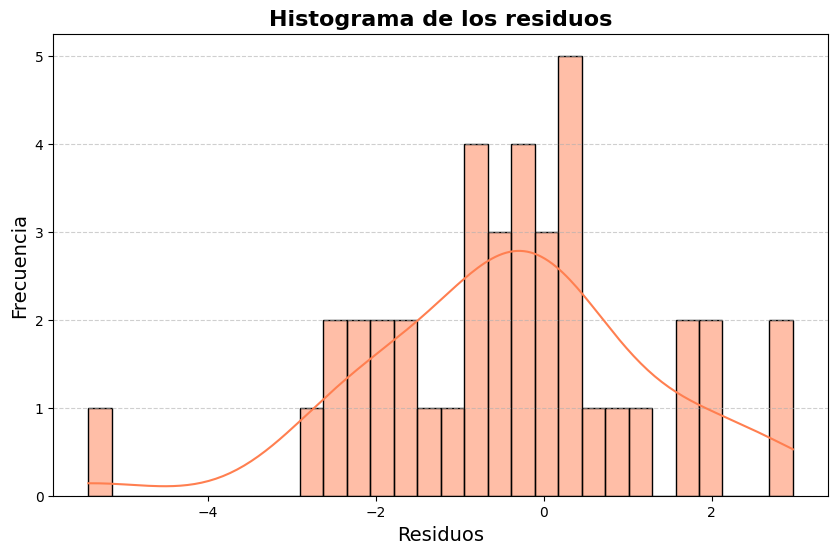

prueba de normalidad de los residuos:

Valor p: 0.3966464156486731


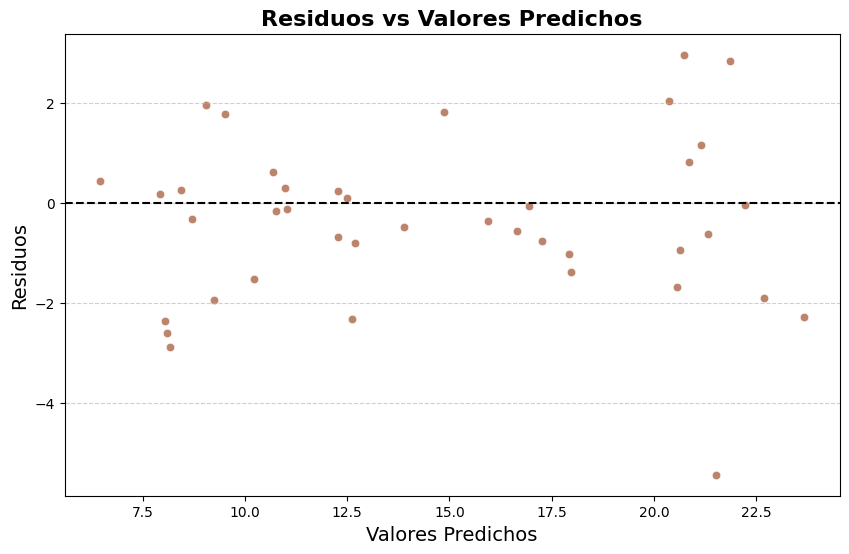

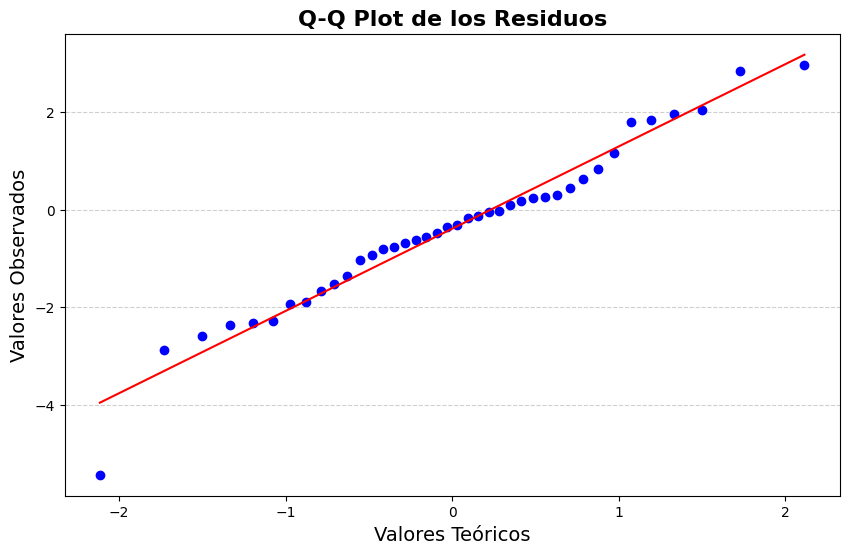

MSE: 2.846616122131541
RMSE: 1.6871917858179433
R²: 0.9078797802624651
MAE: 1.2670422434730484


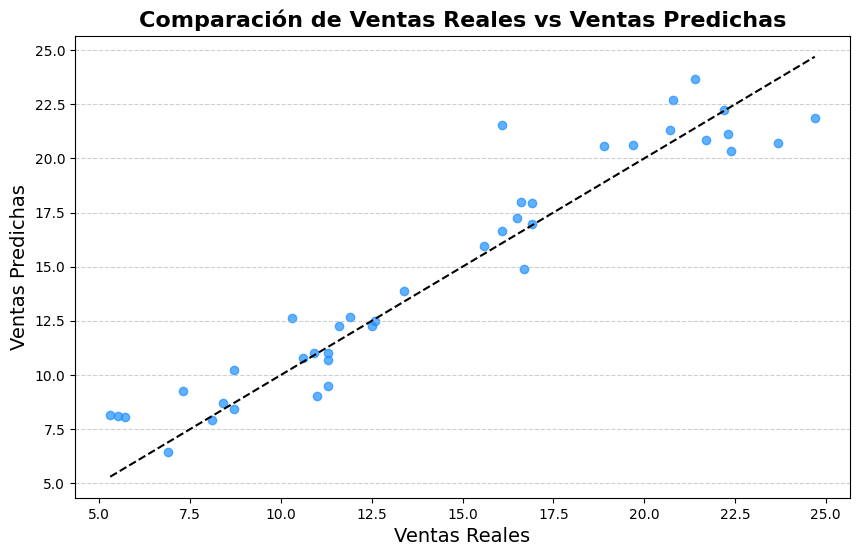

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     705.7
Date:                Fri, 04 Apr 2025   Prob (F-statistic):           3.43e-79
Time:                        04:21:30   Log-Likelihood:                -305.98
No. Observations:                 160   AIC:                             618.0
Df Residuals:                     157   BIC:                             627.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7914      0.328     14.606      0.0

In [62]:
header('Parte 6')
X = df[['TV', 'Radio']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = LinearRegression()
modelo.fit(X_train, y_train)
print(f'Intercepto: {modelo.intercept_}\nCoeficientes:')
for i,var in enumerate(X.columns):
  print(f"{var}:{modelo.coef_[i]}")
separador()

residuos = y_test - modelo.predict(X_test)
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, color='coral', bins=30)
plt.title('Histograma de los residuos', size=16, fontweight='bold')
plt.xlabel('Residuos', size=14)
plt.ylabel('Frecuencia', size=14)
plt.grid(axis='y', linestyle='--', alpha=.6)
plt.show()


print('prueba de normalidad de los residuos:\n')
shapiro_test = stats.shapiro(residuos)
print(f'Valor p: {shapiro_test.pvalue}')


plt.figure(figsize=(10, 6));sns.scatterplot(x=modelo.predict(X_test), y=residuos, color='sienna', alpha=.7)
plt.axhline(y=0, color='black', linestyle='--');plt.title('Residuos vs Valores Predichos', size=16, fontweight='bold')
plt.xlabel('Valores Predichos', size=14);plt.ylabel('Residuos', size=14);plt.grid(axis='y', linestyle='--', alpha=.6);plt.show()


plt.figure(figsize=(10, 6))
stats.probplot(residuos, dist='norm', plot=plt)
plt.title('Q-Q Plot de los Residuos', size=16, fontweight='bold')
plt.xlabel('Valores Teóricos', size=14)
plt.ylabel('Valores Observados', size=14)
plt.grid(axis='y', linestyle='--', alpha=.6)
plt.show()

mse = mean_squared_error(y_test, modelo.predict(X_test))
rmse = np.sqrt(mse)
r2 = r2_score(y_test, modelo.predict(X_test))
print(f'MSE: {mse}\nRMSE: {rmse}\nR²: {r2}')
mae=np.mean(np.abs(y_test-modelo.predict(X_test))) #el mean absolute error lo había visto en kaggle
print(f'MAE: {mae}')


plt.figure(figsize=(10, 6))
plt.scatter(y_test, modelo.predict(X_test), color='dodgerblue', alpha=.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')
plt.title('Comparación de Ventas Reales vs Ventas Predichas', size=16, fontweight='bold')
plt.xlabel('Ventas Reales', size=14)
plt.ylabel('Ventas Predichas', size=14)
plt.grid(axis='y', linestyle='--', alpha=.6)
plt.show()


X = df[['TV', 'Radio']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = sm.add_constant(X_train)
modelo = sm.OLS(y_train, X_train).fit()
print(modelo.summary())

**Interpreta cada uno: ¿Qué significa cada uno de los coeficientes** **en términos de ventas?**

Representan el aumento en "Sales" por cada unidad adicional invertida en ese medio publicitario, manteniendo las demás constantes.

**¿Los residuos parecen distribuirse normalmente?**

Si, la forma de distribución sugiere normalidad.

**¿Observas patrones? ¿Los residuos se dispersan aleatoriamente?**

Si, los residuos se dispersan al rededor de 0, sin un patron.

**Interpreta el q-q plot: a) Si los puntos se alinean** **aproximadamente sobre la línea diagonal, los residuos siguen una** **distribución normal, b) Desviaciones sistemáticas indican asimetría o colas pesadas.**

Los puntos se alinean con la diagonal, lo que indica normalidad en los residuos.

**¿Qué nos dicen las métricas de evaluación sobre el ajuste del modelo?**

El modelo mejoró un poco al eliminar la variable "Newspaper", manteniendo r2.

**¿Qué observas? ¿Qué información puedes obtener de la gráfica de predicciones?**

Las predicciones se ajustan muy bien a los valores reales, lo que indiva un buen desempeño del modelo.

**¿Cuál es la conclusión sobre esas variables según los resultados de regresión OLS?**

"TV" y "Radio" tienen un efecto significativo en las ventas. "Newspaper" no era estadisticamente significativa, por eso se puede eliminar sin mayor problema.

##7. Conclusiones.

**¿Cuál de los tres modelos construidos fue el mejor?**
**¿Cuál fue el atributo que mas influencia tiene en las ventas?**

Solo construí dos modelos por no encontrar una multicolinealidad significativa. De los dos modelos, el mejor fue el que no incluye la columna "Newspaper", ya que según la metrica:
MSE: 2.846616122131541
RMSE: 1.6871917858179433
R²: 0.9078797802624651
MAE: 1.2670422434730484
Mejora por muy poco pero sigue manteniendo r2 alto, lo que indica que el modelo sigue siendo muy bueno. El atributo que mas influencia tiene en las ventas es el dinero invertido en "radio", ya que tiene el coeficiente mas alto y un p-valor muy bajo, reforzando su relevancia.